# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
# your code here
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt

In [2]:
# your code here
df = pd.read_csv('exch_rates.csv', index_col = 0, parse_dates=[0])
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4838 entries, 2000-01-03 to 2018-11-26
Data columns (total 3 columns):
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3)
memory usage: 151.2 KB


Plot the three exchange rates in one plot

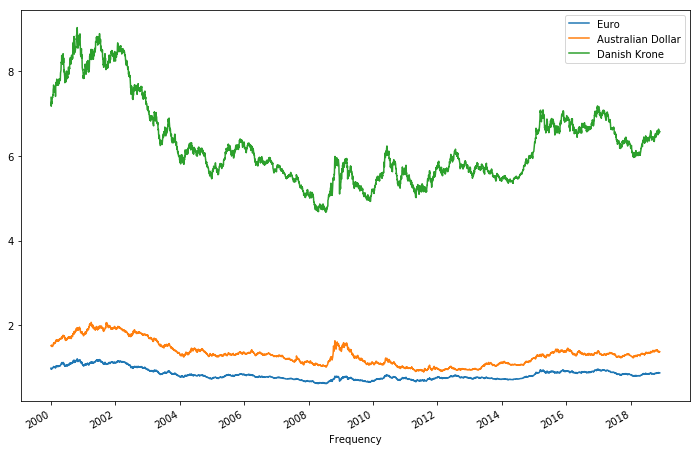

In [3]:
# your code here
df.plot(figsize = (12,8));

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [4]:
# your code here
df.diff().corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.551734,0.999688
Australian Dollar,0.551734,1.000000,0.551566
Danish Krone,0.999688,0.551566,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

By detrending the data it's clear that there is correlation between the Euro and the Danish Krone. This isn't surprising, since they're in the same region with similar governance.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

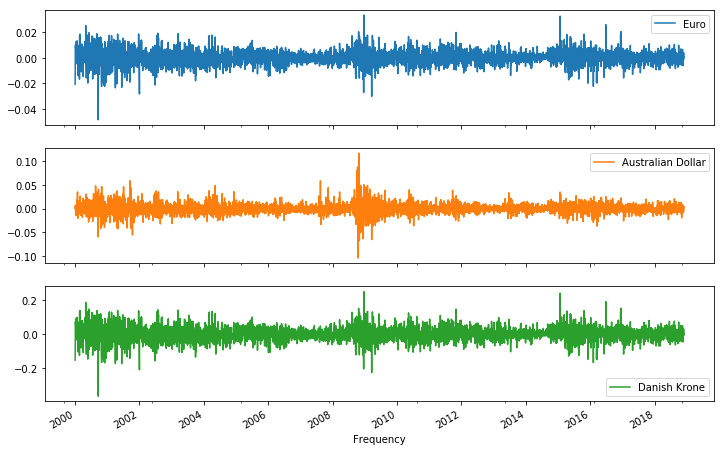

In [5]:
# your code here
df.diff().plot(subplots = True, figsize = (12,8));

### Explain what's going on

The spikes between the Danish Krone and the Euro line up. Look at the first spike (negative outlier) that occurs around 2001 in the Euro, and see how well it matches up with the Danish Krone. This spike is absent in the Australian dollar. If we zoomed in on the data we'd see that there are strong correlations throughout, not just in the spikes.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

,Euro,Euro
Euro,1.000000,0.999119
Euro,0.999119,1.000000


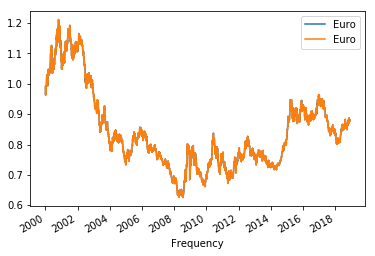

In [6]:
# your code here
lag1= pd.concat([df.shift(1), df], axis=1)
lag1.Euro.plot()
lag1.Euro.corr()

,Australian Dollar,Australian Dollar
Australian Dollar,1.000000,0.999216
Australian Dollar,0.999216,1.000000


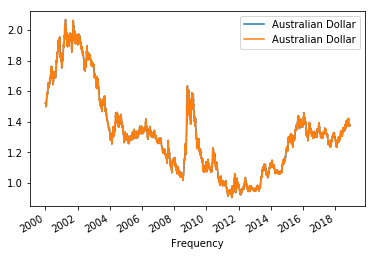

In [7]:
# your code here
lag1['Australian Dollar'].plot()
lag1['Australian Dollar'].corr()

,Danish Krone,Danish Krone
Danish Krone,1.000000,0.999122
Danish Krone,0.999122,1.000000


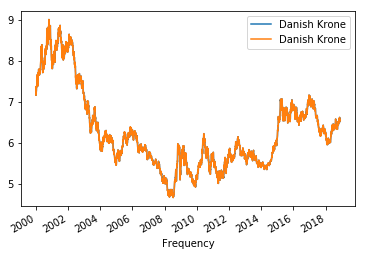

In [8]:
# your code here
lag1['Danish Krone'].plot()
lag1['Danish Krone'].corr()

Repeat this, but for a "lag 5 autocorrelation"

,Euro,Euro
Euro,1.000000,0.995738
Euro,0.995738,1.000000


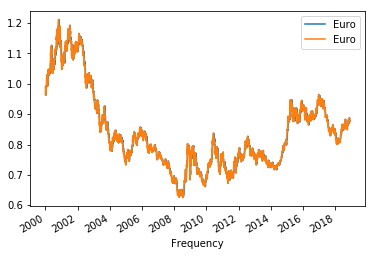

In [9]:
# your code here
lag5= pd.concat([df.shift(periods = 5), df], axis=1)
lag5.Euro.plot()
lag5.Euro.corr()

In [10]:
# your code here

### What's your conclusion here?

The autocorrelation decreased as the lag time increased.

Knowing this, let's plot the ACF now.

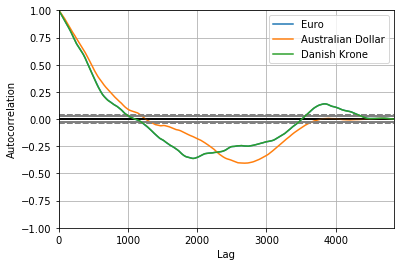

In [11]:
# your code here
for column in df.columns:
    pd.plotting.autocorrelation_plot(df[column], label = column);

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

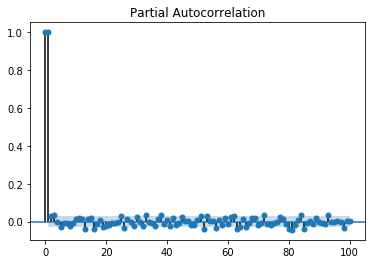

In [12]:
plot_pacf(df.Euro, lags = 100);

In [ ]:
# your code here
for column in df.columns:
    plot_pacf(df[column])

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [17]:
# your code here
df = pd.read_csv('passengers.csv',index_col=[0], parse_dates=[0])
df.columns = ['Passengers']

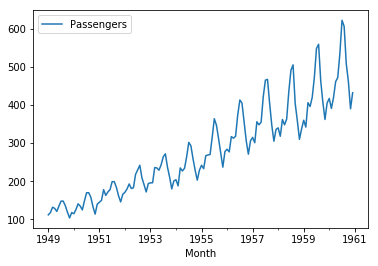

In [19]:
# your code here
df.plot();

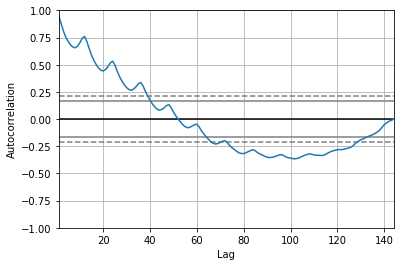

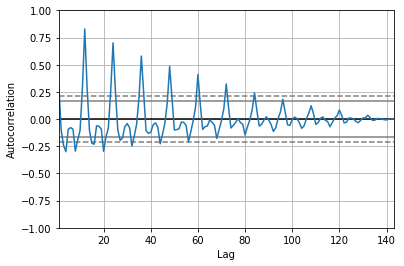

In [27]:
# your code here
pd.plotting.autocorrelation_plot(df);
plt.show()
pd.plotting.autocorrelation_plot(df.diff().dropna());

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


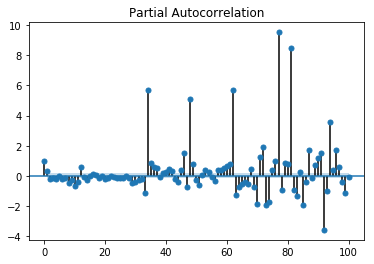

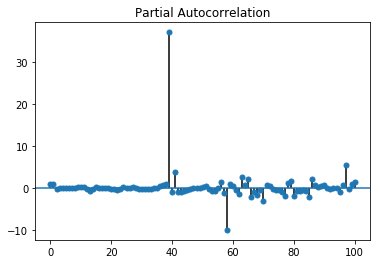

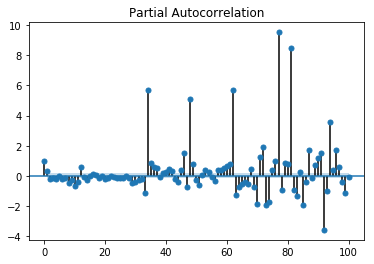

In [28]:
# your code here
plot_pacf(df, lags = 100)
plot_pacf(df.diff().dropna(), lags = 100)

### Your conclusion here

There appears to be a seasonal effect in the data, which shows up as multiple spikes in the ACF plot for the differences. The fact that the correlation decays in the ACF plot for the dataset tells me that this is likely an AR(1) model.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

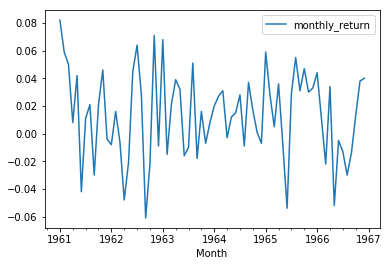

In [30]:
# your code here
df = pd.read_csv('NYSE_monthly.csv',index_col=[0], parse_dates=[0])
df.plot();

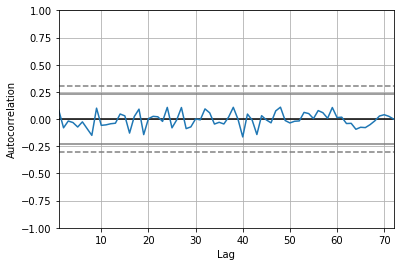

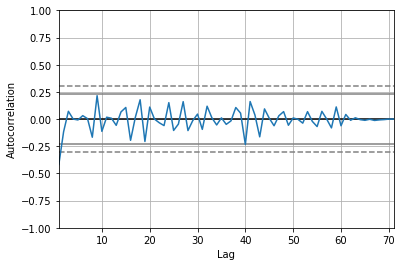

In [31]:
# your code here
pd.plotting.autocorrelation_plot(df);
plt.show()
pd.plotting.autocorrelation_plot(df.diff().dropna());

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


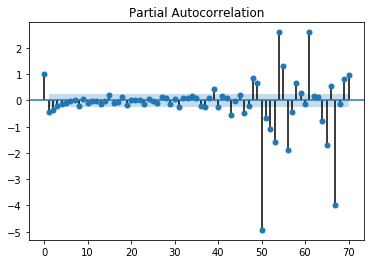

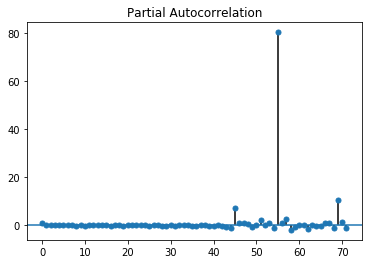

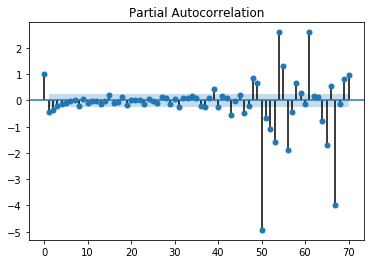

In [32]:
# your code here
plot_pacf(df, lags = 100)
plot_pacf(df.diff().dropna(), lags = 100)

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!